# Basic Models
## Sequence to Sequence Model
- Let's use x1...x5 to represent the words in the input sequence and we'll use y1 to y6 to represent the words in the output sequence.
- Let's have a network whcih we're going to call the encoder network be built as a RNN and this could be GRU or LSTM feeding the input French words on word at a time.
- After ingesting the input sequence the RNN then outputs a vector that represents the input sentence.  After that, we can build a decoded network, which takes input the encoding output and then can be trained to output the translation one word at a time until the decoder stops.
- This model simply uses an encoding network whose job is to find an encoding of the input French sentence, and then use a decoding network to then generate the corresponding English  translation.
- 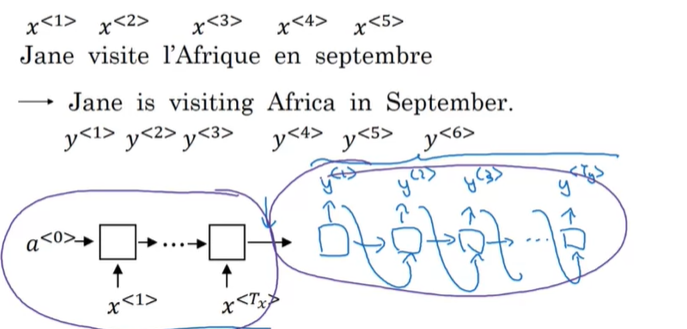

## Image Captioning
- The architecture also works for image captioning.
- Given an image and we wanted to be caption automatically.
- We can input an image into a ConvNet, maybe a pre-trained AlexNet, and have that learn and encoding a learner to the features of the input image.
- If we get rid of the final softmax  unit, the pre-trained AlexNet can give us a 4096 dimensional feature vector of which to represent the picture. This pre-trained network can be the encoded network for the image and we now have a 4096-dimensional vector that represents the image. We can then take this and feed it to an RNN whose job is to generate the caption one word at a time. 
- 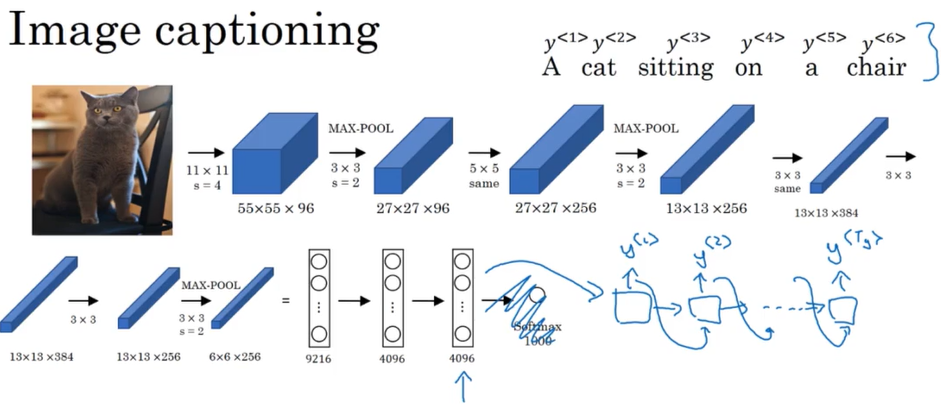
- There are some differences b/w how we'll run a model like this, the generally the sequence compared to how we were synthesizing novel text using a language model. One of the key differences is we don't want to randomly choose in translation. We may be want the most likely translation or we might want the best caption and most likely caption.

# Picking the Most Likely Sentence
## Machine translation as building a conditional language model
- In language modeling, the model allows us to estimate the probability of a sentence. 
- The machine translation model is very similar to the language model, except that instead of alowsys starting along with the vector of all zeros, it instead has an encoded network that figures out some representation for the input sentence, and it takes that input sentence and starts off the decoded network with representation of the input sentence rather than with the representation of all zeros. 
- Instead of modeling the probability of any sentence, it is now modeling the probabiliy of the output English translation, conditions on some input French sentence. In other words, we're trying to estimate the probability of an English translation. 
- 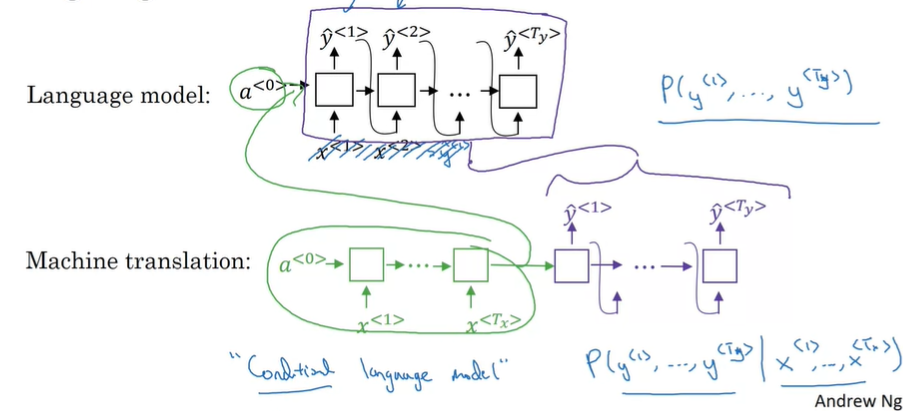

## Finding the most likely translation
- If we want to apply the model to actually tranlate a sentence from French into English, given the input French sentence, the model might tell us what is the probability of difference in corresponding English translations. If X is the French sentence, the model tells us what is the probability of different English translations of that French input.
- We should not try to sample at random from the distribution. Instead what we would like is to find the English sentence y, that maximizes that conditional probability.
- So, in developing a machine translation system, one of the things we need to do is come up with an algorithm that can actually find the value of y that maximizes the probability. 
- The most common algorithm for dong this is called beam search.
- 

## Why not a greedy search?
- This ultimately ends up resulting in a less optimal sentence, in a less good sentence as measured by thie model for p(y|x).
- If we want to find the sequence of wors, y1, y2,... y_n the final word that together maximized the probability, it's not always optimal to just pick one word at a time. 
- 

# Beam Search  
- For machine translation, given an input French sentence, we don't want to output a random English language translation, we want to ouput the best and the most likely English tranlation. The same is also true for speech recognition where given an input audio clip, we don't want to output a random text transcript of that audio, we want to output the best, maybe the most likely, text transcript.
## Beam Search algorithm
- Step 1 : The 1st thing Beam search has to do is try to pick the 1st words of the English translation, that's going to output. 
    - The beam search try to evaluate what is the probability of the 1st word. So what's the probability of the 1st output y, given the input French sentence X.
    - The greedy search will pick only the most likely words and move on, whereas Beam search instead can consider multiple alternatives. The beam search has a parameter called B, which is called the beam width.
    - So, in this 1st step of Beam search, what we need to do is run the input French sentence through the encoder network and then the 1st step will then decode the network, softmac overall 10,000 possibilities. Then we would take those 10,000 possible outpurs and keep in memory which were the top 3 (If B=3).
    - 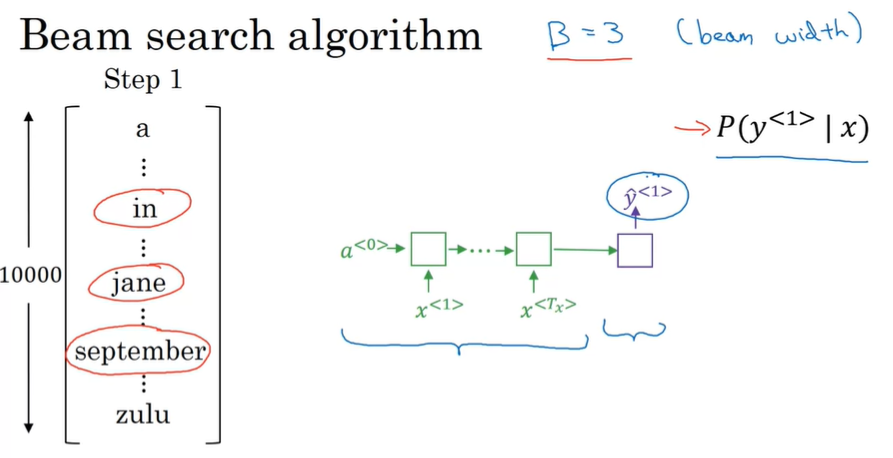
- Step 2 : The beam search will do now, is for each of these 3 choices consifer what should be the 2nd word.
    - The network fragment can be used to evaluate whether it's the probability of the 2nd word given the input french sentence and that the 1st words of the translation has been the word 'eg : in'
    - As if we're continuing to use a beam width of 3, and because there are 10,000 words in the vocabulary we'd end up 30000 possibilities. We now evalute all of these 30000 options according to the probability and then pick the top three (B=3)
    - So these 30,000 possibilites cut down to 3 and beam search would memorize and take on to the next step.
    - 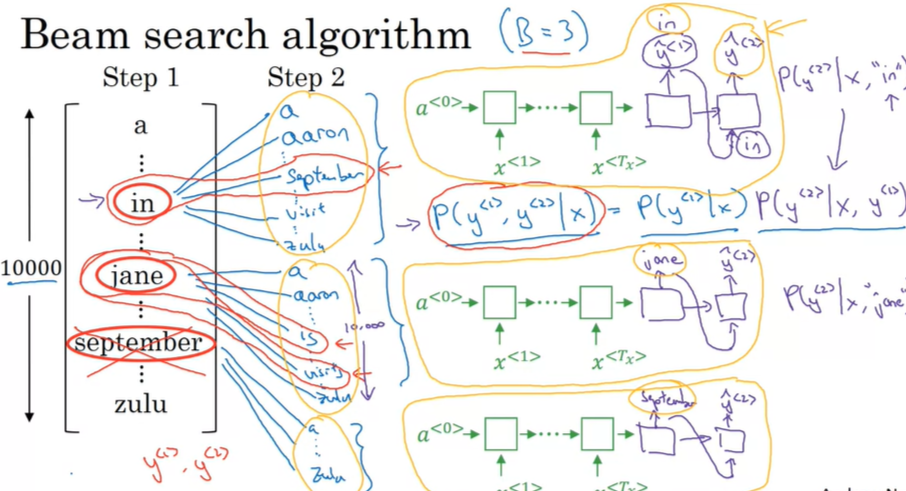
- Step 3 : This network framgment allows us to evalute what's the probability of the 3rd word given the input French sentence X and given that the 1st 2 words and English output.
    - 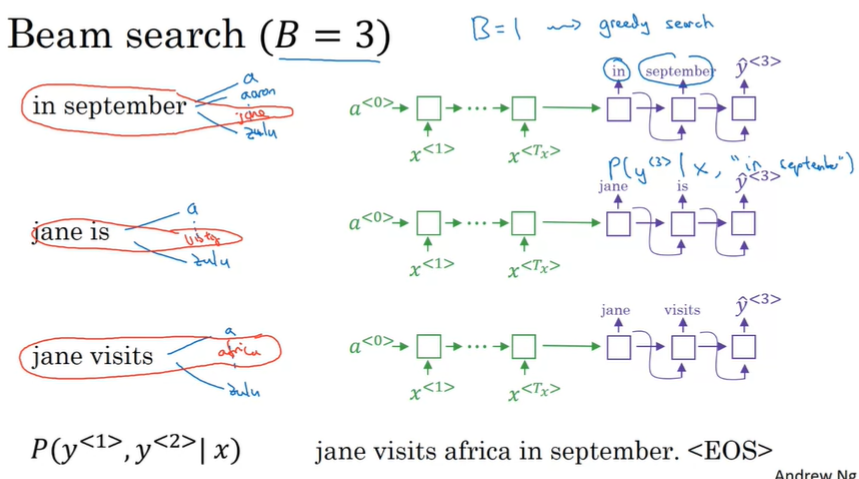
- The outcome of the process will be that adding one word at a time that Beam search will decide that. This will be terminated by the EOS symbol
- If the beams width B = 1, then this becomes the greedy search algorithm but by considering multiple possibilities (say 3 or other numbers) at the same time beam search will usually find a much better output sentence than greedy search. 

# Refinements to Beam Search
## Length Normalization
- Beam search is maximinizing the probability.
- If we're implementing these probabilities which are less than one, and multiplying a lot of numbers less than 1 result in a tiny number, which can result in numerical under-floor, meaning that is too small for the floating point of representation in our computer to store accurately.
- So, instead of maximizing the product, we will take logs and if we inseart a log, then a log product becomes a sum of a log, maximixing the sum of log probabilities should give us the same results in terms of selecting the most likely sentence.
- By taking logs, we end up wtih a more numerically stable algorithm that is less prone to numerical rounding errors or really numerical under-floor.
- There's one other change the algorithm that makes it work better, by using normalization by the number of words in our translation.
- So this takes the average of the log probability of each word
- 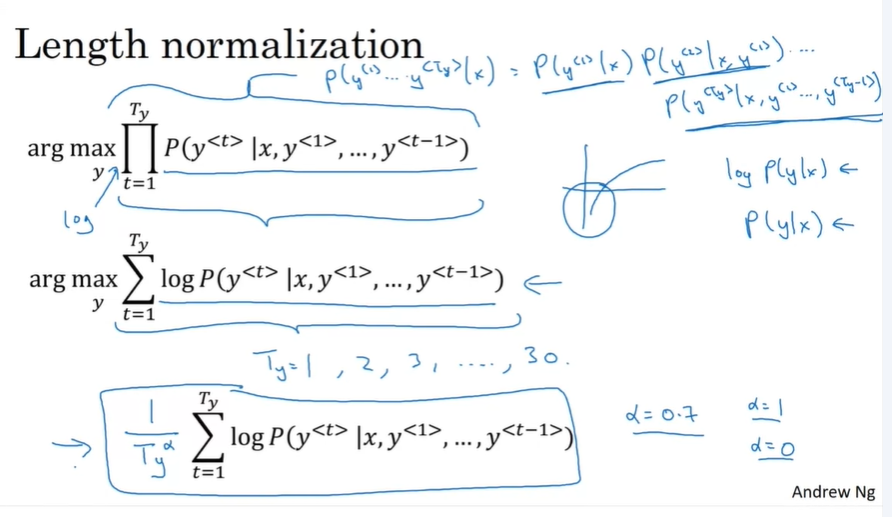

## Beam search dicussion - Beam width B?
- If B is very large,
    - We consider a lot of possibilites and so we tend to get a better result because we're considering a lot of different options, but it will be slower.
    - The memory requirements will also grow and computationally slower.
- If we use a very small beam width,
    - Then we get a worse result because we are just keeping less possibilities in mind as the algorithm is running, but we get a result faster and the memory requirements will also be lower.
- 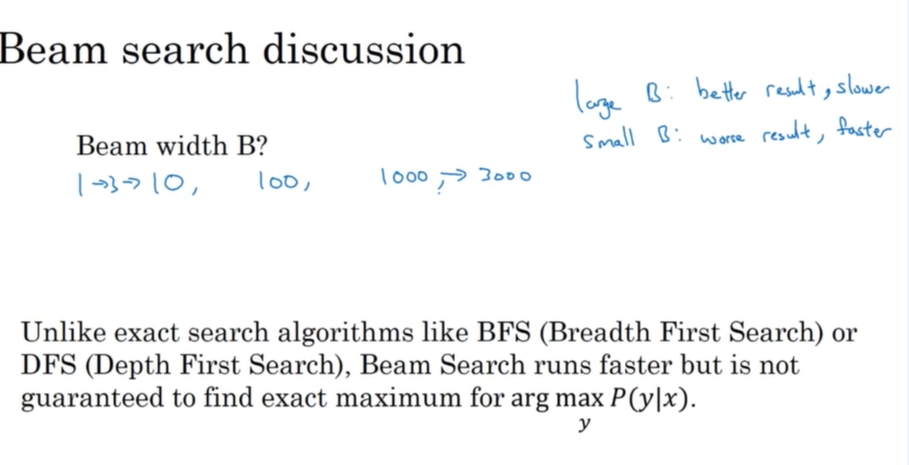

# Error Analysis in Beam Search
- Beam search is an approximate search algorithm also called a heuristic search algorithm.
- It doesn't always output the most likely sentence. It's only keeping track of B=3, 10 or 100 possibilities. 
- Error analysis interacts with beam search and how we can figure out whether it is the beam searh algorithm that's causing problems and worth spending time on.
## Example
- 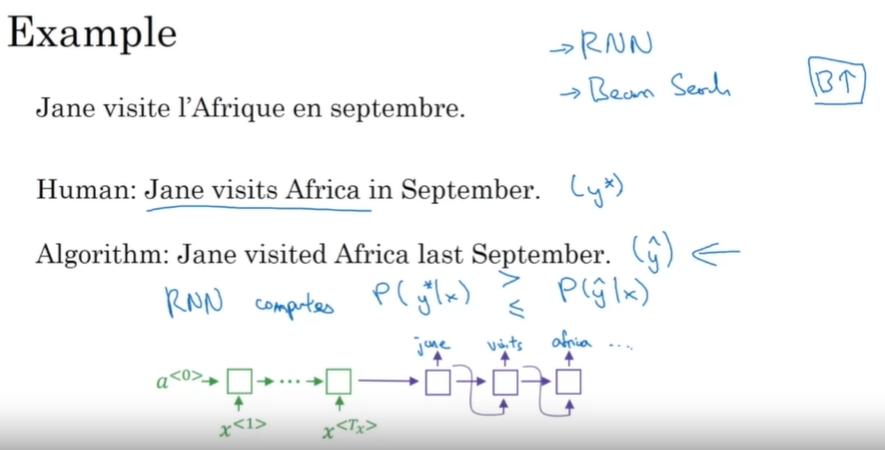
## Error analysis on beam search
- 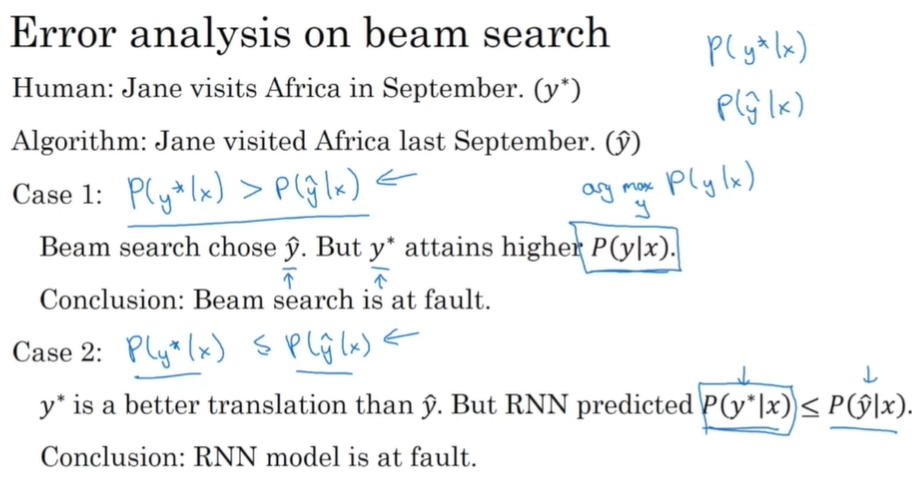
## Error analysis process
- If we find that beam search is responsible for a lot of errors, then maybe is we're working hard to increase the beam width.
- If we find that the RNN model is at fault, then we could do a deeper layer analysis to try to figure out if we want to add regularization, or get more training data or try a different network architecture. 
- 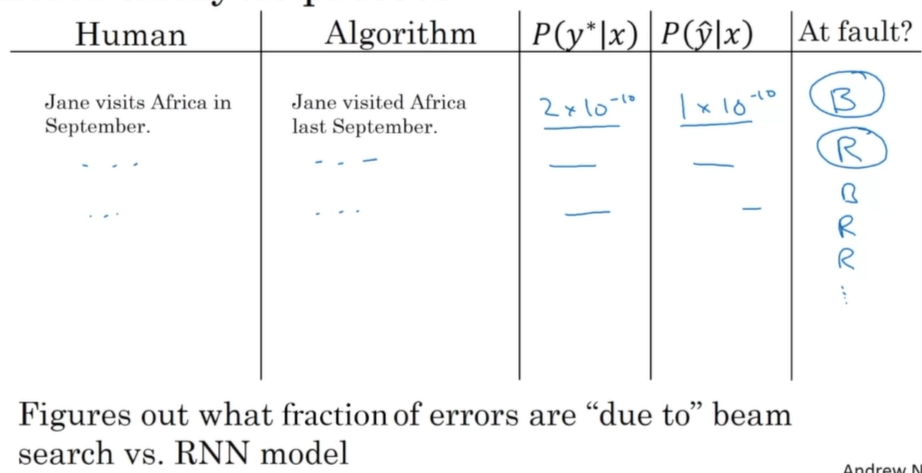

# Attention Model Intuition
- We've been using a Encoder-Decoder architecture for machine translation where one RNN reads in a setence and then different one outputs a sentence.
- There's a modification to this called the Attention Model, that makes all this work much better. 

## The Problem of long sequences
- Given a very long French Sentence X. So the encoder network to do is, to read in the whole sentence and then memorize the whole sentences and store it in the activations. Then the decoder network then generate the English translation.
- But the human translator would read the 1st part of it, then generate part of the translaton. Then look at the 2nd part, generate a few more words and so on. We kind of work part by part through the sentence, because it's just difficult to memorize the whole long sentence.
- Our previous Encoder-Decoder architecture works quite well for short sentences, so we might achive a relatively high Bleu score, but for very long sentence, the performance comes down. 
- For long sentences, it doesn't do well because it's just difficult to get in our network to memorize a super long sentence.
- With attention model, which translates a bit more like humand might looking at part of the sentence at a time and with an attention model, machine translation system performance looks better.
- 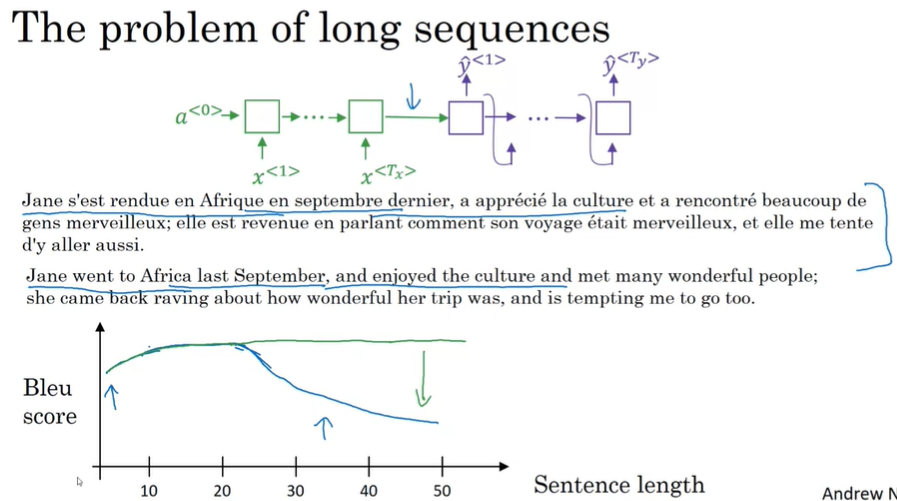

## Attention model intuition
- Let's say that we use a bidirectional RNN, in order to compute some set of features for each of the input word.
- The attention model would be computing is a set of attention weights. The alpha1 denotes how much should we pay attention to the piece of information
- The RNN marhces forward generating one word at a time, until eventually it generates the EOS and at every step, there are attention weights alpha TT Prime that tells it when we're tring to generate the T english word, how much should we be paying attention to the T prime French words.
- This allows it on every time step to look only maybe within a local window of the French sentence to pay attention to, when generating a specific English word. 
- 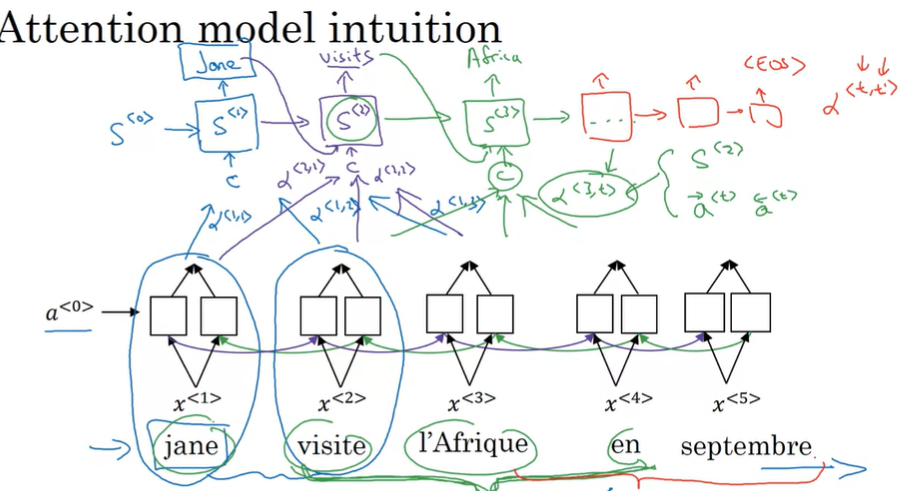

- The network up here looks like a pretty standard RNN sequence with the context vectors as output. The correct wording should say that the context vectors are 'inputs' to the post-attention RNN.

# Attention Model
- Let's assume we have an input setnece and use a birectional RNN or bidirectional GRU or bidirectional LSTM to compute features on every word.
- a^t_prime represents both the forward and backward activation for time step t.
- Next, we have our forward only single direction RNN with state s to generate the translation.
- The attention parameter alpha tells us how much attention context would depend on the feature we're getting or the activation we're getting from the different time steps.
- The way we define the context is actually the sum of the features from the different time steps weighted by these attention weights. 
- The network looks like a standard RNN sequence with the context vectors as input from the post-attention RNN and we can just generate the translaton one word at a time
- 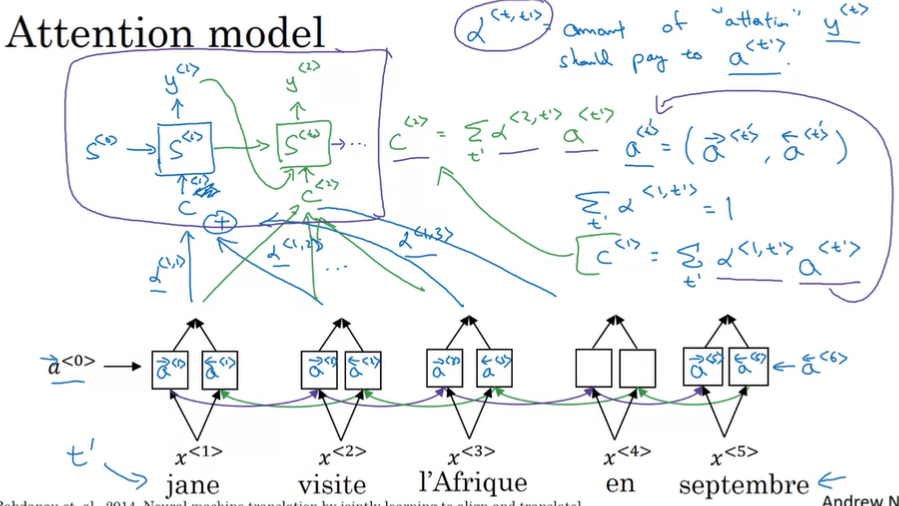

## Computing attention alpha
- 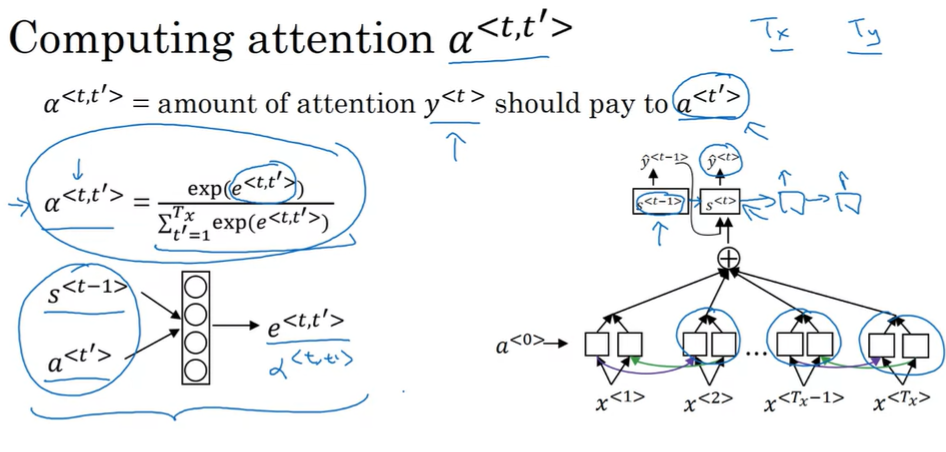

## Attention examples
- 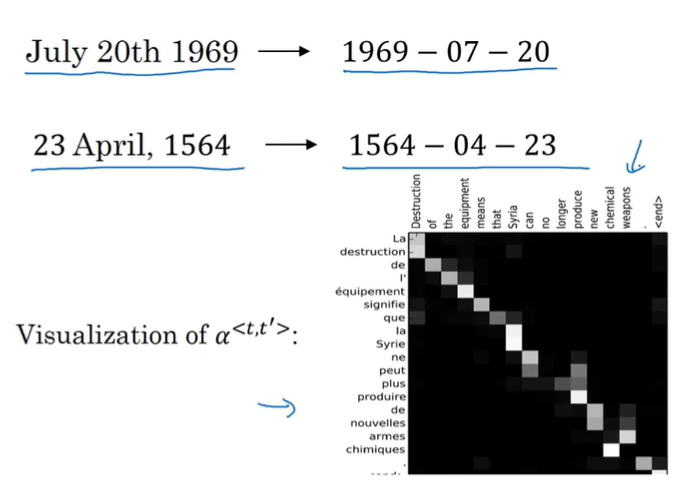